   ## Data 620 - Week 2 Assignment

### Team No. 6

- Yohannes Deboch
- Sherranette Tinapunan

### Presentation Video 
https://screencast-o-matic.com/watch/cqnXnK372K


### Assignment
In this assignment, you’re asked to create the nodes and edges for a basic graph, such as the Krackhardt kite.

### Data Set

Name: Infectious
Source: http://konect.uni-koblenz.de/networks/sociopatterns-infectious

This data set describes a network of face-to-face interaction between people during the exhibition INFECTIOUS: STAY AWAY in 2009 at the Science Gallery in Dublin. 

Nodes represent visitors.
Edges represents face-to-face contact for at least 20 seconds. 

Multiple edges between two nodes are possible, which means that there were multiple face-to-face interactions. 

- Size:            410 vertices (visitors)
- Volume:          17,298 edges (contacts)
- Unique volume:   2,765 edges (contacts)


### About data set columns

- First column: ID of from node 
- Second column: ID of to node
- Third column: edge weight
- Fourth column: timestamp of the edge


### Imports

In [4]:
import pandas as pd
import networkx as nx

### Load Data Set

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/Shetura36/Data-620/master/Week%202/out.sociopatterns-infectious.csv") 

### Preview of Data

In [9]:
data.head()

,from_node,to_node,edge_weight,timestamp
0,100,101,1,1247658439
1,100,101,1,1247660019
2,100,102,1,1247658579
3,100,103,1,1247658159
4,100,103,1,1247658179


### Create Subset

In this assignment, we are only interested in creating a network graph of unique face-to-face interactions only. Duplicate rows are going to be dropped. Only the columns 'from_node" and 'to_node' are going to be used.


In [25]:
distinct_contact = data[['from_node', 'to_node']].drop_duplicates()

distinct_contact.head()

,from_node,to_node
0,100,101
2,100,102
3,100,103
7,100,104
10,100,105


There are 2,765 distinct person to person interactions. 

In [22]:
len(distinct_contact.index)

2765

### Create Edges and Generate a Symmetric Network Graph

The code below creates an edge for each node pair in the data set. 

In [28]:
g = nx.Graph()

for index, row in distinct_contact.iterrows():
    g.add_edge(row['from_node'], row['to_node'])

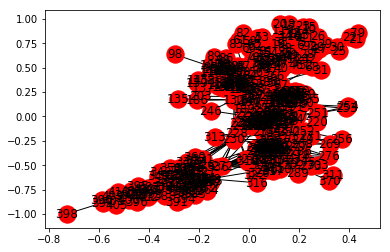

In [30]:
nx.draw_networkx(g)

The network graph above plots 2,765 connections. It's a bit hard to see because there are a lot of nodes and edges. 

### Create a Network Graph for Node 100

To create a smaller network graph, we are going to only look at rows that have node 100. Node 100 is either the 'from_node' or the 'to_node'. 

Below you will see a list of all the rows that have node 100. 


In [61]:
node100 = distinct_contact[(distinct_contact.from_node == 100) | (distinct_contact.to_node == 100)]
node100

,from_node,to_node
0,100,101
2,100,102
3,100,103
7,100,104
10,100,105
20,100,106
28,100,108
29,100,109
32,100,110
37,100,111


### Network Graph for Node 100

Below is the network graph for node 100, which shows all the face-to-face contact that node 100 has. 

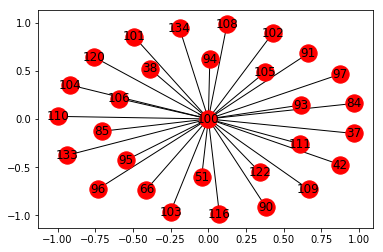

In [62]:
g2 = nx.Graph()

for index, row in node100.iterrows():
    g2.add_edge(row['from_node'], row['to_node'])
    
nx.draw_networkx(g2)